### 1_Exploration

In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.datasets import load_breast_cancer
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
brt_cancer=load_breast_cancer()
brt_cancer.keys()
brt_cancer['data']

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [3]:
#데이터셋을 데이터프레임화
df = pd.DataFrame(brt_cancer.data, columns=brt_cancer.feature_names)

#라벨값을 추가
df['diagnosis']=pd.DataFrame(brt_cancer.target)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


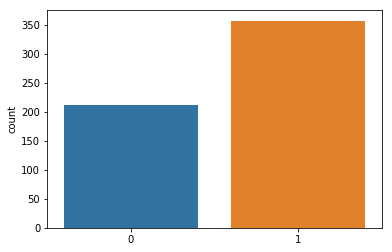

In [4]:
#라벨 데이터가 0(cancerous)또는 1(non_cancerous)로 나누어져있는지 확인 -> logistic regression의 조건
plt.figure(figsize=(6,4))
sns.countplot(x=brt_cancer.target,data=df)

In [5]:
#탐색
non_cancerous,cancerous=df['diagnosis'].value_counts()
print('Number of cells labeled cancerous: ', cancerous)
print('Number of cells labeled non_cancerous : ', non_cancerous)
print('')
print('% of cells labeled cancerous', round(cancerous / len(df) * 100, 2), '%')
print('% of cells labeled non_cancerous', round(non_cancerous / len(df) * 100, 2), '%')

Number of cells labeled cancerous:  212
Number of cells labeled non_cancerous :  357

% of cells labeled cancerous 37.26 %
% of cells labeled non_cancerous 62.74 %


### 2_모델 만들기

In [6]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

#X,y변수 지정
X= df['mean radius'].values.reshape(-1,1)
y = df['diagnosis'].values

print(X[:3],y[:3])

[[17.99]
 [20.57]
 [19.69]] [0 0 0]


In [7]:
df['diagnosis'].values.reshape(-1,1)==df['diagnosis'].values

array([[ True,  True,  True, ...,  True,  True, False],
       [ True,  True,  True, ...,  True,  True, False],
       [ True,  True,  True, ...,  True,  True, False],
       ...,
       [ True,  True,  True, ...,  True,  True, False],
       [ True,  True,  True, ...,  True,  True, False],
       [False, False, False, ..., False, False,  True]])

In [8]:
from sklearn.model_selection import train_test_split 

#train, test data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)

print("X_train 크기: ",X_train.shape)
print("y_train 크기: ",y_train.shape)
print("X_test 크기: ",X_test.shape)
print("y_test 크기: ",y_test.shape)

X_train 크기:  (398, 1)
y_train 크기:  (398,)
X_test 크기:  (171, 1)
y_test 크기:  (171,)


In [9]:
#모델에 피팅
clf = LogisticRegression()
clf.fit(X_train,y_train)

#테스트 스코어 확인
print("Train R2: ",clf.score(X_train,y_train))
print("Test R2: ",clf.score(X_test,y_test))

Train R2:  0.8793969849246231
Test R2:  0.8947368421052632


### 2_시각화

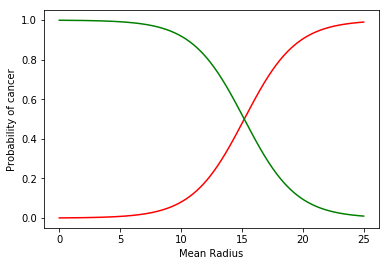

In [10]:
#mean radius값의 범위에 맞게 X_new 조정
X_new = np.linspace(0, 25, 1000).reshape(-1,1)
y_prob=clf.predict_proba(X_new)

#플랏 그리기
plt.ylabel('Probability of cancer')
plt.xlabel('Mean Radius')
plt.plot(X_new, y_prob[:,0], 'r-', label='cancerous')
plt.plot(X_new, y_prob[:,1], 'g-', label='non cancerous')

In [11]:
#20과 0.1을 넣어본다.
clf.predict([[20], [0.1]])

array([0, 1])

### 결론
#### 0은 Cancerous, 1은 Non-cancerous를 의미하므로, 이 모델에 따르면 89.47%의 가능성으로 Mean Radius가 20인 Instance는 Cancerous로 판정되고, 0.1인 Instance는 Non-cancerous로 판정된다. 해당 모델은 Mean Radius가 15일때 임계점을 가진다. 15이하의 Mean Radius를 가지면 Non-cancerous, 이상은 Cancerous로 판정한다.